In [201]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import rootpy
import scipy

from FluorSpec.PTI_Data import PTI_Data
import FluorSpec.ReadFromPTI
reload(FluorSpec.ReadFromPTI)
from FluorSpec.ReadFromPTI import PTIData

In [218]:
file_paths = ["Noah/Integrating Sphere Tests for PPO Contamination/EmissionScan_NoCuvette_300_290-450_0point5nm_2sec_IS_20170613_1158_OUTSLIT_WIDTH_HALVED.txt",
              "Noah/Integrating Sphere Tests for PPO Contamination/EmissionScan_NoCuvette_300_290-450_0point5nm_5sec_IS_20170613_1409_OUTSLIT_WIDTH_HALVED.txt",
              "Noah/Integrating Sphere Tests for PPO Contamination/EmissionScan_NoCuvette_300_290-450_0point5nm_2sec_IS_20170613_1113.txt",
             ]
for i in range(310,340+1,10):
    file_paths.append("Henry/Sphere/PPO_ETOH/EmissionScan_0x31gperL_PPOinETOH_ex%d_2sec_160831.txt" %i)

for i in range(310,340+1,10):
        file_paths.append("Henry/Sphere/PPO_ETOH/EmissionScan_3x14gperL_PPOinETOH_ex%d_2sec_160831.txt" %i)
file_paths.append("Henry/Sphere/PPO_ETOH/EmissionScan_3x14gperL_PPOinETOH_ex335_2sec_160901.txt")


'''Reading in Data'''
# Test comparison
IS_2sec_small_slit = PTIData(file_paths[0])
IS_2sec_large_slit = PTIData(file_paths[2])

IS_5sec_small_slit = PTIData(file_paths[1])

#Data from Henry at 0.31 g/L
IS_PPOETOH_ex310_0x31 = PTIData(file_paths[3])
IS_PPOETOH_ex320_0x31 = PTIData(file_paths[4])
IS_PPOETOH_ex330_0x31 = PTIData(file_paths[5])
IS_PPOETOH_ex340_0x31 = PTIData(file_paths[6])

# Data from Henry at 3.14 g/L
IS_PPOETOH_ex310_3x14 = PTIData(file_paths[7])
IS_PPOETOH_ex320_3x14 = PTIData(file_paths[8])
IS_PPOETOH_ex330_3x14 = PTIData(file_paths[9])
IS_PPOETOH_ex335_3x14 = PTIData(file_paths[11])
IS_PPOETOH_ex340_3x14 = PTIData(file_paths[10])

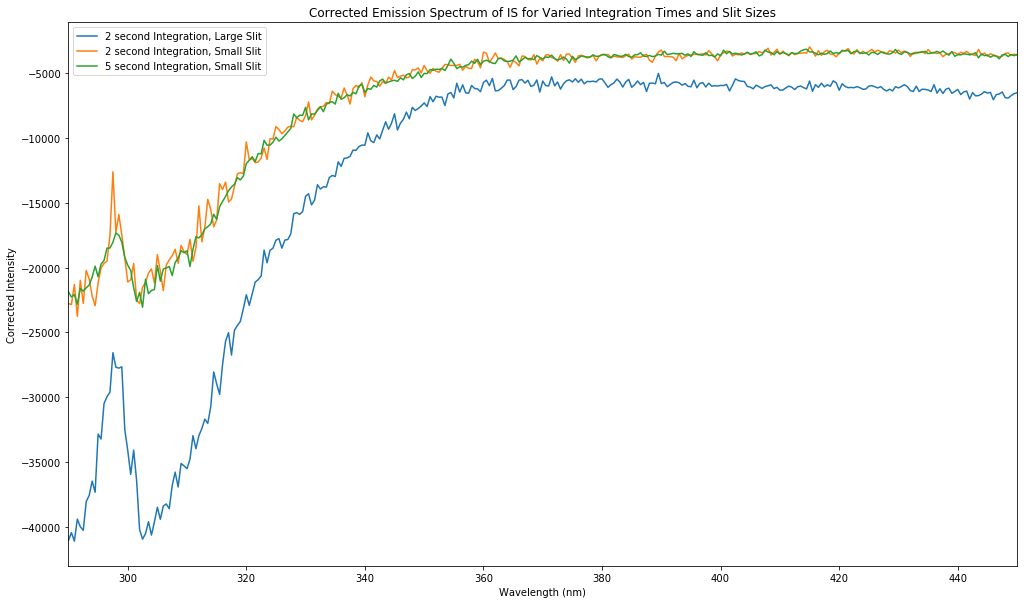

In [219]:
'''Comparing the slit sizes'''
fig, axes = plt.subplots(figsize=(17,10), nrows = 1, ncols=1)

IS_2sec_large_slit.cor_data.plot(x="wavelength", ax=axes)
IS_2sec_small_slit.cor_data.plot(x="wavelength", ax=axes)

IS_5sec_small_slit.cor_data.plot(x="wavelength", ax=axes)
axes.set_title("Corrected Emission Spectrum of IS for Varied Integration Times and Slit Sizes")
axes.set_xlabel("Wavelength (nm)")
axes.set_ylabel("Corrected Intensity")
axes.legend(["2 second Integration, Large Slit", "2 second Integration, Small Slit","5 second Integration, Small Slit"])
plt.show()

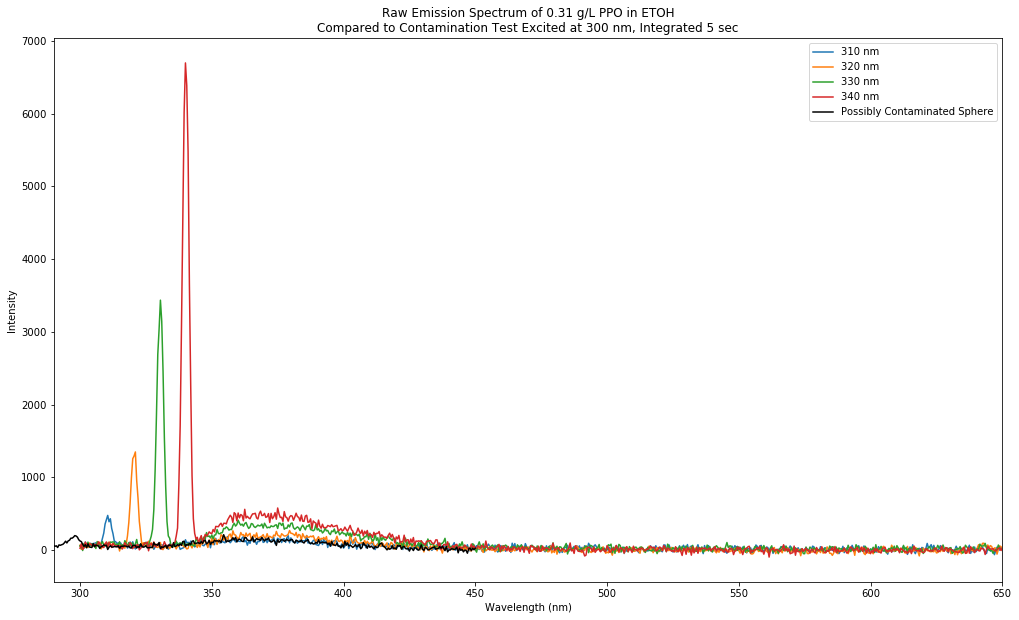

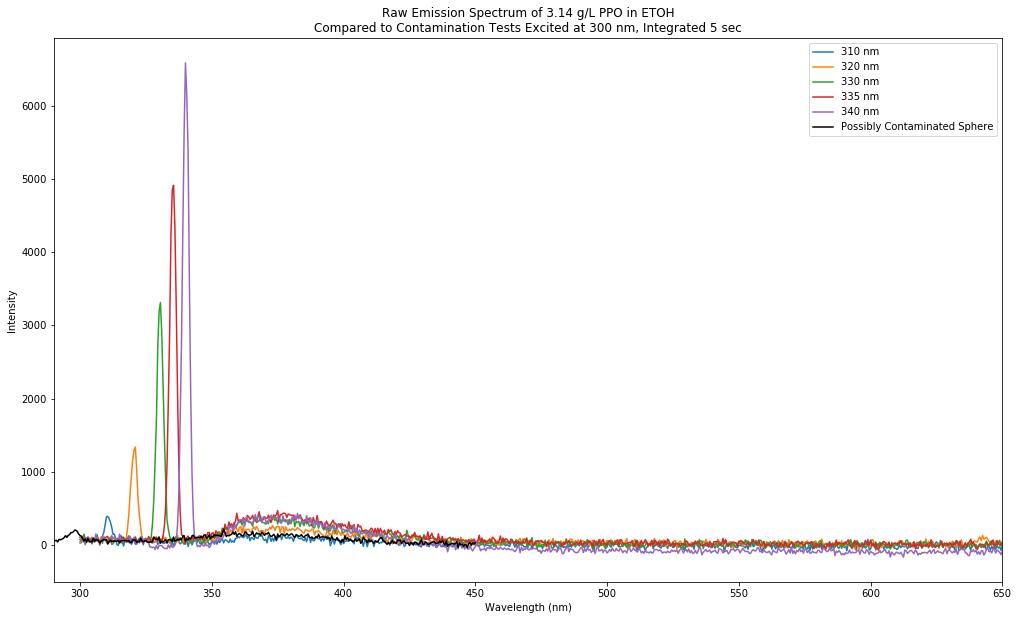

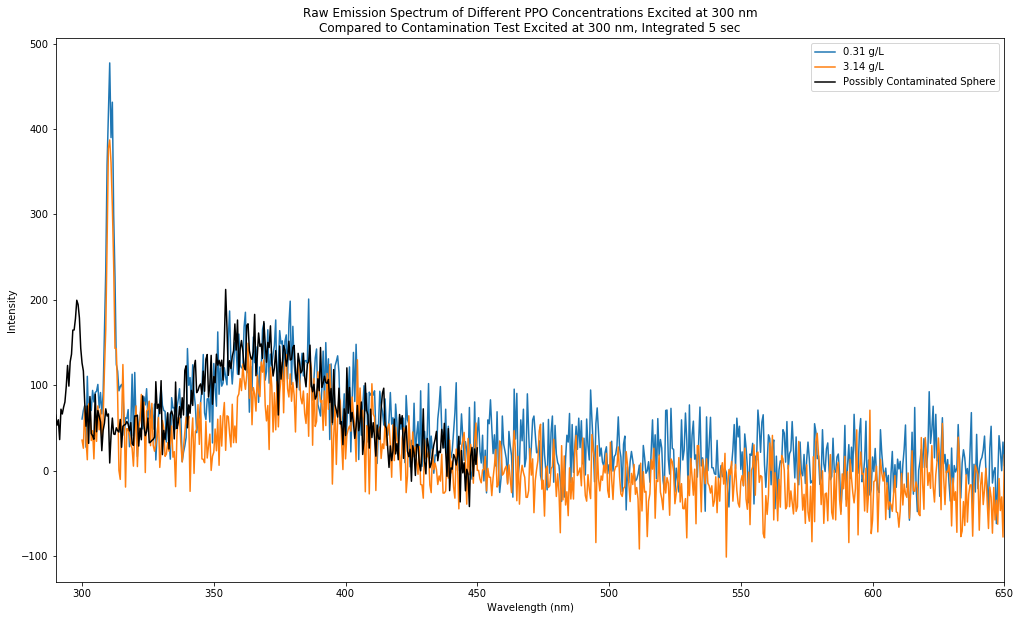

In [220]:
'''Plotting comparisons with last years data'''

# Shift the base line for the contamination tests with a rough estimate
IS_5sec_small_slit.raw_data['intensity'] -= 1.1*IS_5sec_small_slit.raw_data['intensity'][0]

# Plotting 0.31 g/L
fig1,axes1 = plt.subplots(figsize=(17,10), nrows=1, ncols=1)

IS_PPOETOH_ex310_0x31.raw_data.plot(x="wavelength",ax=axes1)
IS_PPOETOH_ex320_0x31.raw_data.plot(x="wavelength",ax=axes1)
IS_PPOETOH_ex330_0x31.raw_data.plot(x="wavelength",ax=axes1)
IS_PPOETOH_ex340_0x31.raw_data.plot(x="wavelength",ax=axes1)
IS_5sec_small_slit.raw_data.plot(x="wavelength", ax=axes1,color='k')

axes1.set_title("Raw Emission Spectrum of 0.31 g/L PPO in ETOH\nCompared to Contamination Test Excited at 300 nm, Integrated 5 sec")
axes1.set_ylabel("Intensity")
axes1.legend(["310 nm", "320 nm", "330 nm", "340 nm", "Possibly Contaminated Sphere"])
axes1.set_xlabel("Wavelength (nm)")
plt.show()

#Plotting 3.14 g/L
fig2,axes2 = plt.subplots(figsize=(17,10), nrows=1, ncols=1)

IS_PPOETOH_ex310_3x14.raw_data.plot(x="wavelength",ax=axes2)
IS_PPOETOH_ex320_3x14.raw_data.plot(x="wavelength",ax=axes2)
IS_PPOETOH_ex330_3x14.raw_data.plot(x="wavelength",ax=axes2)
IS_PPOETOH_ex335_3x14.raw_data.plot(x="wavelength",ax=axes2)
IS_PPOETOH_ex340_3x14.raw_data.plot(x="wavelength",ax=axes2)
IS_5sec_small_slit.raw_data.plot(x="wavelength", ax=axes2,color='k')

axes2.set_title("Raw Emission Spectrum of 3.14 g/L PPO in ETOH\nCompared to Contamination Tests Excited at 300 nm, Integrated 5 sec")
axes2.set_xlabel("Wavelength (nm)")
axes2.set_ylabel("Intensity")
axes2.legend(["310 nm", "320 nm", "330 nm", "335 nm", "340 nm", "Possibly Contaminated Sphere"])
plt.show()

# Plotting the test with the 310 nm excitation for both 0.31 and 3.14 g/L
fig3,axes3 = plt.subplots(figsize=(17,10), nrows=1, ncols=1)
IS_PPOETOH_ex310_0x31.raw_data.plot(x="wavelength",ax=axes3)
IS_PPOETOH_ex310_3x14.raw_data.plot(x="wavelength",ax=axes3)
IS_5sec_small_slit.raw_data.plot(x="wavelength", ax=axes3,color='k')
axes3.set_title("Raw Emission Spectrum of Different PPO Concentrations Excited at 300 nm\nCompared to Contamination Test Excited at 300 nm, Integrated 5 sec")
axes3.set_xlabel("Wavelength (nm)")
axes3.set_ylabel("Intensity")
axes3.legend(["0.31 g/L", "3.14 g/L", "Possibly Contaminated Sphere"])
plt.show()